(AAEVALEVEC)=

# 2.3 Algoritmos y aplicaciones de eigenvalores y eigenvectores de una matriz

```{admonition} Notas para contenedor de docker:

Comando de docker para ejecución de la nota de forma local:

nota: cambiar `<ruta a mi directorio>` por la ruta de directorio que se desea mapear a `/datos` dentro del contenedor de docker.

`docker run --rm -v <ruta a mi directorio>:/datos --name jupyterlab_optimizacion -p 8888:8888 -d palmoreck/jupyterlab_optimizacion:2.1.4`

password para jupyterlab: `qwerty`

Detener el contenedor de docker:

`docker stop jupyterlab_optimizacion`

Documentación de la imagen de docker `palmoreck/jupyterlab_optimizacion:2.1.4` en [liga](https://github.com/palmoreck/dockerfiles/tree/master/jupyterlab/optimizacion).

```

---

Nota generada a partir de [liga](https://www.dropbox.com/s/s4ch0ww1687pl76/3.2.2.Factorizaciones_matriciales_SVD_Cholesky_QR.pdf?dl=0).

```{admonition} Al final de esta nota el y la lectora:
:class: tip

* Pondrá en uso los conocimientos revisados en las notas de {ref}`operaciones y transformaciones básicas del Álgebra Lineal Numérica <OTBALN>` y {ref}`eigenvalores y eigenvectores <EIGVALEIGVEC>` para comprender los algoritmos básicos y típicos que se han desarrollado en el análisis numérico para el cálculo de eigenvalores y eigenvectores de una matriz simétrica.

* Comprenderá la relación entre el método de *pagerank* para el ordenamiento o *ranking* de una página web utilizada por *Google* y el problema del cálculo de eigenvalores y eigenvectores de una matriz.

```

En esta nota **asumimos** que la matriz $A \in \mathbb{R}^{n \times n}$ es simétrica. Esto tiene como consecuencia que sus eigenvalores son reales y existe una base de eigenvectores ortonormal, ver {ref}`descomposición espectral de una matriz simétrica <DESCESP>`.

(ROTJACMATSIM)=

## Rotaciones de Jacobi para matrices simétricas $A \in \mathbb{R}^{n \times n}$

Este método produce una secuencia de transformaciones ortogonales de la forma $J_k^TAJ_k$ con el objetivo de hacer "más diagonal" a la matriz $A \in \mathbb{R}^{n \times n}$.

Si la matriz $A$ es simétrica y $J_0$ es una transformación de rotación de Jacobi, ver {ref}`transformaciones de rotación <TROT>`, entonces el esquema iterativo:

$$A_{k+1} = (J_0 J_1 \cdots J_k)^T A(J_0 J_1 \cdots J_k)$$

**converge** a una matriz diagonal en la que se encuentran los eigenvalores de $A$.

```{margin}

Los pasos de un algoritmo representan una guía para la implementación, no implica que se tengan que implementar uno a continuación del otro como se describe. Si una implementación respeta la lógica y al mismo algoritmo, entonces pueden seguirse los pasos de una forma distinta.
```

### Algoritmo: método de rotaciones de Jacobi para matrices simétricas

> **Dados** $A$ simétrica y $tol >0$ **definir** $A_0 = A$, $Q_0 = I_n$.
>
> **Repetir** el siguiente bloque para $k=0,1,2,\dots$
>> 1. Elegir un par de índices $(idx1,idx2)$ con alguna de las metodologías descritas en el bloque siguiente de comentarios.
>>
>> 2. Calcular las entradas $\cos(\theta),\sin(\theta)$ de la matriz de rotación $J_k$.
>>
>> 3. $A_{k+1} = J_k^T A_k J_k$
>>
>> 4. $Q_{k+1} = Q_{k}J_k$.
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $tol$ y $maxsweeps$.



La matriz $J_k$ se utiliza para eliminar un par de entradas (simétricas) en la matriz $A_k$, esto  preserva la simetría de la matriz original. En las columnas de la matriz $Q_{k}$ se encuentran aproximaciones a los eigenvectores de $A$ y en la diagonal de $A_{k}$ se tienen aproximaciones a los eigenvalores de $A$.

```{admonition} Comentarios

En el método se hace mención de **metodologías** que ayudan a elegir los índices del renglón y columna del par de entradas de $A$ que serán eliminadas (hacer cercanas a cero). Algunas de éstas son:

1.Elegir $(idx1,idx2)$ tales que $|a_{idx1,idx2}| = \displaystyle \max_{i \neq j}|a_{ij}|$.

2.**Ordenamiento cíclico por renglones:** elegir $(idx1, idx2)$ en el conjunto $(1,2),(1,3),\dots,(1,n),(2,3),(2,4)\dots,(n-1,n)$.

```

```{admonition} Observación
:class: tip

Obsérvese que $A_{k+1}$ y $A_{k}$ son matrices ortogonalmente similares, ver {ref}`similitud <SIMILITUD>`.

```

Para encontrar la forma que debe tener $J_k$ es suficiente considerar el caso $2 \times 2$ y se **asume** que $a_{12} \neq 0$ pues **si $a_{12} =0$ entonces no hay que realizar rotación**:

$$
\begin{eqnarray}
J_k^TAJ_k &=&  
\left [
\begin{array}{cc}
c & -s\\
s & c
\end{array}
\right ]
\left [
\begin{array}{cc}
a_{11} & a_{12}\\
a_{12} & a_{22}
\end{array}
\right ]
\left [
\begin{array}{cc}
c & s\\
-s & c
\end{array}
\right ]
\nonumber \\
&=&
\left [
\begin{array}{cc}
c^2a_{11} -2 csa_{12} + s^2a_{22} & c^2a_{12} - cs(a_{22}-a_{11})-s^2a_{12}\nonumber \\
c^2a_{12} - cs(a_{22}-a_{11})-s^2a_{12} & c^2a_{22}+2csa_{12}+s^2a_{11} \nonumber
\end{array}
\right ]
\nonumber 
\end{eqnarray}
$$

donde: $c$ y $s$ representan a $\cos(\theta), \sin(\theta)$ respectivamente y $\theta$ ángulo para rotar.


Si se desea que la entrada $(1,2)$ (equivalentemente por simetría la $(2,1)$) sea cero se debe cumplir:

$$c^2a_{12} - cs(a_{22}-a_{11})-s^2a_{12}=0.$$

Asignando la variable $t = \frac{s}{c}$ (tangente de $\theta$) se obtiene la ecuación cuadrática:

$$1 - t\frac{(a_{22}-a_{11})}{a_{12}} - t^2 = 0.$$

Equivalentemente:

$$t^2 + t\frac{(a_{22}-a_{11})}{a_{12}} - 1 = t^2 + 2\tau t -1 = 0$$


```{margin}

Las funciones $\frac{1}{\tau+\sqrt{\tau^2+1}}$, $\frac{1}{\tau-\sqrt{\tau^2+1}}$ son estrictamente decrecientes para $\tau \geq 0$ y $\tau < 0$ respectivamente. Un valor de $\tau$ corresponde a un único ángulo $\theta \in \left [-\frac{\pi}{4}, \frac{\pi}{4} \right ]$.
```

donde: $\tau = \frac{a_{22}-a_{11}}{2a_{12}}$. Las raíces de la ecuación anterior están dadas por:

$$
\begin{eqnarray}
t_1^* &=& -\tau + \sqrt{\tau^2+1}&=&\frac{1}{\tau+\sqrt{\tau^2+1}} \nonumber \\
t_2^* &=& -\tau - \sqrt{\tau^2+1}&=&\frac{1}{\tau-\sqrt{\tau^2+1}} \nonumber
\end{eqnarray}
$$


Se **sugiere** utilizar la raíz de menor magnitud para disminuir errores por redondeo por lo que:

$$t^* = \frac{\text{signo}(\tau)}{|\tau| + \sqrt{1+\tau^2}}$$

donde:

$$
\text{signo}(x) = \begin{cases}
1 \text{ si } x>=0\\
-1 \text{ en otro caso}
\end{cases}
$$

Las relaciones entre coseno, seno y tangente permiten obtener sus valores correspondientes:

$$c = \frac{1}{\sqrt{1+t^{*2}}},$$

$$s = ct^*$$

y así tener completamente definida a la matriz $J_k$.

### Ejemplo

Considera: 

$$
A = 
\left [
\begin{array}{cc}
1&2\\
2&1\\
\end{array}
\right ].
$$

Eliminar las entradas $(1,2)$ y $(2,1)$ con una matriz $J$ de rotación de Jacobi:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.set_printoptions(precision=3, suppress=True)

In [3]:
def sign(x):
    """
    Helper function for computing sign of real number x.
    """
    if x >=0:
        return 1
    else:
        return -1

In [4]:
def compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2):
    """
    Helper function for computing entries of Jacobi rotation.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        c (float): value of cos of theta for Jacobi rotation matrix.
        s (float): value of sin of theta for Jacobi rotation matrix.
    """
    if np.abs(Ak[idx1,idx2]) > np.finfo(float).eps:
        tau = (Ak[idx2, idx2] - Ak[idx1, idx1])/(2*Ak[idx1, idx2])
        t_star = sign(tau)/(np.abs(tau) + np.sqrt(1+tau**2))
        c = 1/np.sqrt(1+t_star**2)
        s = c*t_star
    else: #no rotation is performed
        c = 1
        s = 0
    return (c,s)

In [5]:
A = np.array([[1,2],
              [2,1]])

In [6]:
A_k = A.copy()

In [7]:
print(A_k)

[[1 2]
 [2 1]]


```{margin}

Estos son los índices que corresponden a la entrada $a_{12}$ de $A$.

```

In [8]:
idx_1 = 0
idx_2 = 1

In [9]:
c, s = compute_cos_sin_Jacobi_rotation(A_k, idx_1, idx_2)

```{margin}

La matriz de rotación de Jacobi es en este caso de tamaño $2 \times 2$.

```

In [10]:
J = np.array([[c, s],
              [-s, c]])

In [11]:
print(J.T@A@J)

[[-1.  0.]
 [ 0.  3.]]


Por construcción $A$ y $J^TAJ$ son similares y por tanto tienen el mismo espectro:

In [12]:
print(np.linalg.eigvalsh(A))

[-1.  3.]


In [13]:
print(np.linalg.eigvalsh(J.T@A@J))

[-1.  3.]


Ver [eigvals](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigvals.html) y [eigvalsh](https://jiffyclub.github.io/numpy/reference/generated/numpy.linalg.eigvalsh.html).

````{admonition} Comentarios

* En matrices mayores a dos dimensiones el método de rotaciones de Jacobi para matrices simétricas requiere **eliminación repetida** (volver a hacer cercanas a cero) del par de entradas de $A$ seleccionadas de iteraciones previas pues en cada iteración se destruyen (vuelven a ser diferentes de cero) en general. 

* El método de rotaciones de Jacobi para matrices simétricas utiliza como criterios de paro:

    * La cantidad $\text{off}(A) = \sqrt{\displaystyle \sum_{i=1}^n \sum_{j=1, j\neq i}^n a_{ij}^2}$ (norma de Frobenius de $A$ sin la diagonal, ver {ref}`Normas matriciales <NMAT>`).
    
    * Número máximo de *sweeps*. Un *sweep* es igual a $\frac{n(n-1)}{2}$ y corresponde al número máximo de entradas de la matriz que forman la parte triangular superior de $A$ sin contar a la diagonal que se asumen diferentes de cero. No existe teoría rigurosa para el número de *sweeps* pero una heurística encontrada por [Brent y Luk, p. 13, 1985](https://ecommons.cornell.edu/handle/1813/6402) menciona que el número máximo es proporcional a $\mathcal{O}(\log(n))$ y en la práctica se utilizan entre $6$ y $10$, ver [H. Rutishauser, The Jacobi method for real symmetric matrices, 1966](https://link.springer.com/article/10.1007/BF02165223).

* El criterio de paro es de la forma:

```
while off(A_k) > tol ||A_k||_F && sweeps < max_sweeps
```

con `||A_k||_F` norma de Frobenius de $A_k$ y `sweeps` contador de los *sweeps*.
````

### Ejemplo

Considera: 

$$
A = 
\left [
\begin{array}{cccc}
1 & 2 & 3 & 4\\
2 & -2 & 4 & 5\\
3 & 4 & 6 & 7\\
4 & 5 & 7 & -8
\end{array}
\right ].
$$

Utilizando la metodología de ordenamiento cíclico por renglones realizar dos *sweeps* del método de rotaciones de Jacobi para matrices simétricas.

In [14]:
def compute_Jacobi_rotation(Ak, idx1, idx2):
    """
    Compute Jacobi rotation matrix.
    Args:
        Ak (numpy ndarray): Matrix of iteration k in Jacobi rotation method.
        idx1 (int): index for rows in Jacobi rotation matrix.
        idx2 (int): index for columns in Jacobi rotation matrix.
    Returns:
        J (numpy ndarray): Jacobi rotation matrix.
    """
    c,s = compute_cos_sin_Jacobi_rotation(Ak, idx1, idx2)
    m,n = Ak.shape
    J = np.eye(m)
    J[idx1, idx1] = J[idx2, idx2] = c
    J[idx1, idx2] = s
    J[idx2, idx1] = -s
    return J

In [15]:
A = np.array([[1,2,3,4],
              [2,-2,4,5],
              [3, 4, 6, 7],
              [4, 5, 7,-8.0]])

In [16]:
print(A)

[[ 1.  2.  3.  4.]
 [ 2. -2.  4.  5.]
 [ 3.  4.  6.  7.]
 [ 4.  5.  7. -8.]]


In [17]:
A_k = A.copy()

El **primer *sweep*** considera las entradas: $(1,2), (1,3), (1,4), (2,3), (2,4), (3,4)$. 

A continuación se toman en el orden $(1,4), (1,3), (1,2), (2,4), (2,3)$ y finalmente $(3,4)$ para mostrar que el orden de selección de las entradas no importa.

```{margin}

Se sugiere haber revisado los ejemplos de {ref}`transformaciones de rotación <TROT>`.
```

**Entrada $a_{41}$ rotación en el plano $(1,4)$:**

In [18]:
idx_1 = 0
idx_2 = 3
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [19]:
A_k = J.T@A_k@J

In [20]:
print(A_k)

[[ 2.521  3.646  5.292 -0.   ]
 [ 3.646 -2.     4.     3.963]
 [ 5.292  4.     6.     5.477]
 [ 0.     3.963  5.477 -9.521]]


**Entrada $a_{31}$ rotación en el plano $(1,3)$:**

In [21]:
idx_1 = 0
idx_2 = 2
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [22]:
A_k = J.T@A_k@J

In [23]:
print(A_k)

[[-1.31   0.608 -0.    -3.212]
 [ 0.608 -2.     5.378  3.963]
 [-0.     5.378  9.831  4.436]
 [-3.212  3.963  4.436 -9.521]]


**Entrada $a_{21}$ rotación en el plano $(1,2)$:**

In [24]:
idx_1 = 0
idx_2 = 1
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [25]:
A_k = J.T@A_k@J

In [26]:
print(A_k)

[[-0.956  0.     2.707 -0.781]
 [ 0.    -2.354  4.648  5.041]
 [ 2.707  4.648  9.831  4.436]
 [-0.781  5.041  4.436 -9.521]]


**Entrada $a_{42}$ rotación en el plano $(2,4)$:**

In [27]:
idx_1 = 1
idx_2 = 3
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [28]:
A_k = J.T@A_k@J

In [29]:
print(A_k)

[[ -0.956  -0.358   2.707  -0.694]
 [ -0.358   0.247   6.165   0.   ]
 [  2.707   6.165   9.831   1.811]
 [ -0.694   0.      1.811 -12.122]]


**Entrada $a_{32}$ rotación en el plano $(2,3)$:**

In [30]:
idx_1 = 1
idx_2 = 2
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [31]:
A_k = J.T@A_k@J

In [32]:
print(A_k)

[[ -0.956  -1.511   2.274  -0.694]
 [ -1.511  -2.769  -0.     -0.796]
 [  2.274   0.     12.847   1.627]
 [ -0.694  -0.796   1.627 -12.122]]


**Entrada $a_{43}$ rotación en el plano $(3,4)$:**

In [33]:
idx_1 = 2
idx_2 = 3
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [34]:
A_k = J.T@A_k@J

In [35]:
print(A_k)

[[ -0.956  -1.511   2.224  -0.84 ]
 [ -1.511  -2.769  -0.052  -0.794]
 [  2.224  -0.052  12.952   0.   ]
 [ -0.84   -0.794   0.    -12.228]]


**Segundo *sweep***

**Entrada $a_{41}$ rotación en el plano $(1,4)$:**

In [36]:
idx_1 = 0
idx_2 = 3
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [37]:
A_k = J.T@A_k@J

In [38]:
print(A_k)

[[ -0.894  -1.448   2.218  -0.   ]
 [ -1.448  -2.769  -0.052  -0.904]
 [  2.218  -0.052  12.952   0.164]
 [ -0.     -0.904   0.164 -12.29 ]]


**Entrada $a_{31}$ rotación en el plano $(1,3)$:**

In [39]:
idx_1 = 0
idx_2 = 2
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [40]:
A_k = J.T@A_k@J

In [41]:
print(A_k)

[[ -1.24   -1.423   0.     -0.025]
 [ -1.423  -2.769  -0.275  -0.904]
 [ -0.     -0.275  13.299   0.162]
 [ -0.025  -0.904   0.162 -12.29 ]]


**Entrada $a_{21}$ rotación en el plano $(1,2)$:**

In [42]:
idx_1 = 0
idx_2 = 1
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [43]:
A_k = J.T@A_k@J

In [44]:
print(A_k)

[[ -0.389  -0.      0.141   0.442]
 [  0.     -3.62   -0.236  -0.789]
 [  0.141  -0.236  13.299   0.162]
 [  0.442  -0.789   0.162 -12.29 ]]


**Entrada $a_{42}$ rotación en el plano $(2,4)$:**

In [45]:
idx_1 = 1
idx_2 = 3
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [46]:
A_k = J.T@A_k@J

In [47]:
print(A_k)

[[ -0.389  -0.04    0.141   0.44 ]
 [ -0.04   -3.549  -0.249   0.   ]
 [  0.141  -0.249  13.299   0.141]
 [  0.44    0.      0.141 -12.361]]


**Entrada $a_{32}$ rotación en el plano $(2,3)$:**

In [48]:
idx_1 = 1
idx_2 = 2
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [49]:
A_k = J.T@A_k@J

In [50]:
print(A_k)

[[ -0.389  -0.038   0.141   0.44 ]
 [ -0.038  -3.552   0.      0.002]
 [  0.141   0.     13.303   0.141]
 [  0.44    0.002   0.141 -12.361]]


**Entrada $a_{43}$ rotación en el plano $(3,4)$:**

In [51]:
idx_1 = 2
idx_2 = 3
J = compute_Jacobi_rotation(A_k, idx_1, idx_2)

In [52]:
A_k = J.T@A_k@J

````{margin}

Obsérvese que las entradas diferentes en la diagonal son más pequeñas que la matriz original $A$.

````

In [53]:
print(A)

[[ 1.  2.  3.  4.]
 [ 2. -2.  4.  5.]
 [ 3.  4.  6.  7.]
 [ 4.  5.  7. -8.]]


In [54]:
print(A_k)

[[ -0.389  -0.038   0.144   0.44 ]
 [ -0.038  -3.552   0.      0.002]
 [  0.144   0.     13.304   0.   ]
 [  0.44    0.002   0.    -12.362]]


```{admonition} Ejercicio
:class: tip

Realizar dos *sweeps* más para la matriz simétrica del ejemplo anterior y sólo dos *sweeps* para la matriz:

$$
A = 
\left [
\begin{array}{ccc}
1 & 0 & 2\\
0 & 2 & 1\\
2 & 1 & 1
\end{array}
\right ]
$$

Para ambos ejercicios calcular en cada iteración realizada $\text{off}(A)$.

```

```{margin}

Los algoritmos que pueden ejecutarse en una forma por bloques se les nombra *blocking algorithms*. Tales algoritmos aprovechan niveles altos de [BLAS](http://www.netlib.org/blas/) en su implementación.

```

```{admonition} Comentarios

Algunas características del método de rotaciones de Jacobi para matrices simétricas:

* Tiene una convergencia cuadrática, esto es, la matriz $A_k$ al ir aproximándose hacia una diagonal, el número de dígitos de precisión en cada iteración se duplica. Sin embargo el algoritmo QR (versión no simple) es más eficiente en cuanto al número de iteraciones.

* La precisión que tiene en el cálculo de eigenvalores es alta (error relativo pequeño).

* Es un algoritmo que puede realizarse con cómputo en paralelo si se utilizan ordenamientos específicos como el cíclico por renglones. También este algoritmo puede realizarse por bloques.

```

(ALGQR)=

## Algoritmo QR o *QR iteration* (versión simple) para matrices simétricas $A \in \mathbb{R}^{n \times n}$

Este método produce una secuencia de transformaciones ortogonales de la forma $Q_k^TAQ_k$ con el objetivo de hacer "más diagonal" a la matriz $A \in \mathbb{R}^{n \times n}$.

Si la matriz $A$ es simétrica y $Q_0$ es una matriz con columnas linealmente independientes entonces el esquema iterativo:

$$T_k = (Q_0 Q_1 \cdots Q_k)^T A(Q_0 Q_1 \cdots Q_k)$$

**casi siempre** converge a una matriz diagonal en la que se encuentran los eigenvalores de $A$, ver {ref}`comentarios algoritmo QR <COMENTARIOSALGQR>` para suposiciones que garantizan la convergencia.

### Factorización QR

**Sólo** en esta subsección **asumimos** $A \in \mathbb{R}^{m \times n}$ con $m >= n$. 

Existen $Q \in \mathbb{R}^{m \times m}$ **ortogonal** y $R \in \mathbb{R}^{m \times n}$ triangular superior tales que $A=QR$:

<img src="https://dl.dropboxusercontent.com/s/hhd15p8r1wh6ac9/A_QR.png?dl=0" heigth="350" width="350">


```{admonition} Comentarios

* La factorización $QR$ puede escribirse en una forma "delgada" obteniéndose la factorización [***thin QR* o *reduced***](https://en.wikipedia.org/wiki/QR_decomposition#Rectangular_matrix) :

<img src="https://dl.dropboxusercontent.com/s/u0u365q5372xihl/A_thin_QR.png?dl=0" heigth="300" width="300">

En este caso $Q_1$ no se nombra ortogonal sino con **columnas ortonormales**, ver {ref}`matriz ortogonal y matriz con columnas ortonormales <MATORTMATCOLORTONO>`, $R_1$ es triangular superior. Si el *rank(A)* es igual a $n$ ($A$ se nombra de **rank completo** o *full rank*) y $R_1$ tiene entradas en la diagonal positivas, la factorización *thin QR* es única.

* La factorización *thin* o *reduced* $QR$ de $A$ realiza un cambio de bases entre las columnas de $A$ y las columnas de $Q_1$ teniendo las entradas de $R$ las coordenadas del cambio entre bases.


* La factorización *QR* puede calcularse con reflexiones de Householder o rotaciones Givens, ver {ref}`transformaciones de reflexión <TREF>` y {ref}`transformaciones de rotación <TROT>`.
```

### Algoritmo: algoritmo QR para matrices simétricas (versión simple)

> **Dados** $A \in \mathbb{R}^{n \times n}$ simétrica, $tol > 0$, $Q_0 \in \mathbb{R}^{n \times n}$ ortogonal **definir** $T_0 = Q_0^TAQ_0$.
>
> **Repetir** el siguiente bloque para $k=1,2,\dots$
>> 1. $T_{k-1} = Q_kR_k$ (factorización $QR$ de $T_{k-1}$).
>>
>> 2. $T_k = R_k Q_k$
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $tol$.



````{admonition} Observaciones
:class: tip

* Obsérvese que $T_k = R_kQ_k = Q_k^T(Q_k R_k)Q_k = Q_k ^TT_{k-1}Q^k$ por lo que $T_k$ y $T_{k-1}$ son ortogonalmente similares, ver {ref}`similitud <SIMILITUD>`.

* Es fácil verificar que $T_k = (Q_0 Q_1 \cdots Q_k)^T A(Q_0 Q_1 \cdots Q_k)$ por lo que $T_k$ es ortogonalmente similar a $A$.

````

### Ejemplo

In [55]:
A = np.array([[7, 2],
              [2, 4]])

Se toma $T_0$ como $A$

**Primera iteración**

In [56]:
T_k_minus_1 = A

```{margin} 

$T_{k-1} = Q_kR_k$.

Ver [numpy.linalg.qr](https://numpy.org/doc/stable/reference/generated/numpy.linalg.qr.html) para factorización QR con *NumPy*.

```

In [57]:
q,r = np.linalg.qr(T_k_minus_1)

```{margin}

Matriz $Q$ ortogonal.
```

In [58]:
print(q)

[[-0.962 -0.275]
 [-0.275  0.962]]


```{margin}

Matriz $R$ triangular superior.

```

In [59]:
print(r)

[[-7.28  -3.022]
 [ 0.     3.297]]


```{margin}

$T_k = R_k Q_k$.

```

In [60]:
T_k = r@q

In [61]:
print(T_k)

[[ 7.83  -0.906]
 [-0.906  3.17 ]]


**Segunda iteración**

In [62]:
T_k_minus_1 = T_k

In [63]:
q,r = np.linalg.qr(T_k_minus_1)

In [64]:
print(q)

[[-0.993  0.115]
 [ 0.115  0.993]]


In [65]:
print(r)

[[-7.882  1.264]
 [ 0.     3.045]]


In [66]:
T_k = r@q

In [67]:
print(T_k)

[[7.975 0.35 ]
 [0.35  3.025]]


**Tercera iteración**

In [68]:
T_k_minus_1 = T_k

In [69]:
q,r = np.linalg.qr(T_k_minus_1)

In [70]:
print(q)

[[-0.999 -0.044]
 [-0.044  0.999]]


In [71]:
print(r)

[[-7.983 -0.482]
 [ 0.     3.006]]


In [72]:
T_k = r@q

````{margin}

Obsérvese que las entradas diferentes en la diagonal son más pequeñas que la matriz original $A$.

````

In [73]:
print(A)

[[7 2]
 [2 4]]


In [74]:
print(T_k)

[[ 7.997 -0.132]
 [-0.132  3.003]]


In [75]:
print(np.linalg.eigvals(A))

[8. 3.]


(COMENTARIOSALGQR)=

````{admonition} Comentarios

* Si $A = Q\Lambda Q^T$, ver {ref}`descomposición espectral de una matriz simétrica <DESCESP>`, el método anterior converge a una matriz diagonal $\Lambda$ en la que se encuentran los eigenvalores de $A$ si se satisfacen las siguientes condiciones:

    * $A \in \mathbb{R}^{n \times n}$ es simétrica.
    
    * $|\lambda_1| > |\lambda_2| > \cdots > |\lambda_n|.$
    
    * El coseno del ángulo entre las columnas de $Q_0$ y las columnas de $Q$ que contienen los eigenvectores de $A$ es diferente de cero (no ortogonales), ver {ref}`normas vectoriales y matriciales <NVM>`. 

* El criterio de paro es de la forma:

```
while off(T_k) > tol ||T_k||_F && iteration < max_iters
```

con `||T_k||_F` norma de Frobenius de $T_k$, `max_iters` número máximo de iteraciones y $\text{off}(T) = \sqrt{\displaystyle \sum_{i=1}^n \sum_{j=1, j\neq i}^n t_{ij}^2}$ (norma de Frobenius de $T$ sin la diagonal, ver {ref}`Normas matriciales <NMAT>`).


````

```{admonition} Ejercicio
:class: tip

Realiza tres iteraciones del algoritmo QR para aproximar los eigenvalores de la matriz:

$$
A = 
\left [
\begin{array}{cccc}
8 & 4 & 2 & 1 \\
4 & 8 & 2 & 1 \\
2 & 2 & 8 & 1 \\
1 & 1 & 1 & 8
\end{array}
\right ]
$$

```

(MPOTMATSIM)=

## Método de la potencia para matrices simétricas $A \in \mathbb{R}^{n \times n}$

Si la matriz $A$ tiene un **único** eigenvalor $\lambda_1$ que tiene máximo módulo y $z^{(0)}$ es un vector distinto de cero entonces el esquema iterativo:

$$z^{(k)} = A z^{(k-1)}$$

**casi siempre** converge a un múltiplo del eigenvector de $A$ asociado a $\lambda_1$, ver {ref}`comentarios del método de la potencia <COMENTARIOSMETPOTENCIA>` para suposiciones que garantizan la convergencia.

### Ejemplo

In [76]:
A = np.array([[1.5, 0.5],
              [0.5, 1.5]])

**Primera iteración**

In [77]:
z_k_minus_1 = np.array([0,1])

```{margin}

$z^{(k)} = Az^{(k-1)}$.

```

In [78]:
z_k = A@z_k_minus_1

In [79]:
print(z_k)

[0.5 1.5]


**Segunda iteración**

In [80]:
z_k_minus_1 = z_k

```{margin}

$z^{(k)} = Az^{(k-1)}$.

```

In [81]:
z_k = A@z_k_minus_1

In [82]:
print(z_k)

[1.5 2.5]


**Tercera iteración**

In [83]:
z_k_minus_1 = z_k

In [84]:
z_k = A@z_k_minus_1

In [85]:
print(z_k)

[3.5 4.5]


**...**

**Novena iteración**

In [86]:
z_k = np.array([127.5, 128.5])

In [87]:
print(z_k)

[127.5 128.5]


Y es más cercano al eigenvector $\left [\begin{array}{c} 1\\ 1 \end{array} \right ]$ (escalado por un factor).

Lo anterior funciona pues si $q_1, \dots, q_n$ son eigenvectores de $A$ y $z^{(0)} = \displaystyle \sum_{i=1}^n \alpha_i q_i$ (combinación lineal) entonces:

$$
\begin{eqnarray}
z^{(k)} &=& A z^{(k-1)} = A^2 z^{(k-2)} = \cdots = A^k z^{(0)} \nonumber \\
&=& A^k \displaystyle \sum_{i=1}^n \alpha_i q_i = \displaystyle \sum_{i=1}^n \alpha_i A^k q_i = \displaystyle \sum_{i=1}^n \alpha_i \lambda_i ^k q_i \nonumber \\
&=& \lambda_1^k \left (\alpha_1 q_1 + \displaystyle \sum_{i=2}^n \left ( \frac{\lambda_i}{\lambda_1} \right ) ^k \alpha_i q_i \right ) \nonumber
\end{eqnarray}
$$

Y como $\left | \frac{\lambda_i}{\lambda_1} \right | < 1$ para $i > 1$ entonces al ir avanzando en las iteraciones lo anterior converge a un múltiplo de $q_1$.

```{admonition} Observación
:class: tip

Se añade normalización del eigenvector en cada iteración para evitar problemas de redondeo como *overflow* y *underflow*.

```

```{margin}

Este mismo algoritmo puede utilizarse para matrices no simétricas. La normalización puede ser con la norma $2$ o norma infinito (incluso funciona la componente que tiene máxima magnitud tomando todo y su signo).

```

### Algoritmo: método de la potencia para matrices simétricas

> **Dados** $A \in \mathbb{R}^{n \times n}$ simétrica, $q^{(0)} \in \mathbb{R}^n$ de norma Euclidiana unitaria y $tol > 0$.
>
> **Repetir** el siguiente bloque para $k=1,2,\dots$
>> 1. $z^{(k)} = Aq^{(k-1)}$.
>>
>> 2. $q^{(k)} = \frac{z^{(k)}}{||z^{(k)}||_2}$.
>>
>> 3. $\lambda ^{(k)} = q^{(k)T} Aq^{(k)}$.
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $tol$.



```{margin}

En el caso no simétrico se requiere que la matriz sea diagonalizable para la convergencia del método, ver {ref}`matriz diagonalizable <DIAGONALIZABLE>`.

```

(COMENTARIOSMETPOTENCIA)=

````{admonition} Comentarios

* El método anterior converge de forma lineal al eigenvalor de máximo módulo $\lambda_1$ y a un eigenvector asociado a tal eigenvalor, $q_1$, si se satisfacen las siguientes condiciones:

    * $A \in \mathbb{R}^{n \times n}$ es simétrica.

    * $\lambda_1$ cumple:

$$
|\lambda_1| > |\lambda_2| \geq \cdots \geq |\lambda_n|
$$

esto es, $\lambda_1$ es el único eigenvalor de máximo módulo.

* El coseno del ángulo entre $q^{(0)}$ y $q_1$ es diferente de cero (no ortogonales), ver {ref}`normas vectoriales y matriciales <NVM>`. Esto no es un requerimiento fuerte pues al usar un sistema de punto flotante y tener errores por redondeo garantiza que en la mayoría de los casos **prácticos** tal coseno es diferente de cero.


* El criterio de paro es de la forma: 

```
while ||Aq_k - lambda_kq_k||_2 > tol && iteration < max_iters
```


````

### Ejemplo 

In [88]:
A = np.array([[1.5, 0.5],
              [0.5, 1.5]])

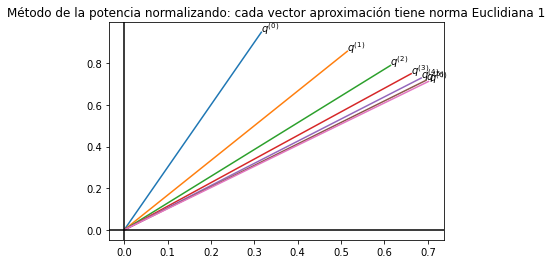

In [89]:
n = 2
q_k = np.array([0,1])
max_iter = 7
q_k_iter = np.zeros((n, max_iter))
lambda_k_iter = np.zeros(max_iter)
for k in range(max_iter):
    z_k = A@q_k
    q_k = z_k/np.linalg.norm(z_k)
    string = "$q^{(%s)}$"%k
    plt.annotate(string,(q_k[0],q_k[1]),fontsize=10)
    q_k_plot = np.row_stack((np.zeros(n), q_k))
    q_k_iter[:,k] = q_k
    lambda_k = q_k.T@A@q_k
    lambda_k_iter[k] = lambda_k
    plt.plot(q_k_plot[:,0], q_k_plot[:,1])
plt.axhline(color='k')
plt.axvline(color='k')
plt.title("Método de la potencia normalizando: cada vector aproximación tiene norma Euclidiana 1")
plt.show()

```{margin}

Compárese con:

```

In [90]:
eigval, eigvec = np.linalg.eig(A)
print("eigenvalor:")
print(eigval)
print("eigenvectores:")
print(eigvec)

eigenvalor:
[2. 1.]
eigenvectores:
[[ 0.707 -0.707]
 [ 0.707  0.707]]


In [91]:
print(q_k)

[0.702 0.713]


In [92]:
print(lambda_k_iter)

[1.8   1.941 1.985 1.996 1.999 2.    2.   ]


```{admonition} Comentarios

* El método de la potencia aproxima al eigenvector asociado al eigenvalor con módulo máximo. Esto en contraste con el algoritmo QR y el método de rotaciones de Jacobi que aproximan todos los eigenvalores y eigenvectores. En la práctica es posible que sólo se requieran unos cuantos eigenvalores-eigenvectores.

* Típicamente funciona el método de la potencia pero puede fallar por razones como:

    * No hay convergencia a un eigenvalor-eigenvector con entradas en $\mathbb{C}$ a partir de una matriz con entradas en $\mathbb{R}$ (pero si se utiliza una matriz $A$ y vectores con entradas en $\mathbb{C}$ se recupera la convergencia).
    * Puede haber más de un eigenvalor que tenga el mismo módulo y la convergencia podría darse para una combinación lineal de los eigenvectores asociados a tales eigenvalores.

* La ventaja que tiene el método de la potencia es que sólo requiere una operación del tipo matriz-vector lo cual para matrices grandes y ralas (también nombradas *sparse*: que tienen muchas entradas iguales a cero) es ventajoso.

* Sólo obtiene al eigenvalor con máximo módulo y un eigenvector asociado, por lo que si se desean otras parejas de eigenvalores-eigenvectores se debe recurrir a métodos adicionales por ejemplo *deflation*.

* La convergencia de este método depende mucho de la cercanía entre $|\lambda_1|$ y $|\lambda_2|$: si son muy cercanos la convergencia es lenta. Esto es posible mejorar al utilizar *shifts*.

```

```{admonition} Ejercicio
:class: tip

Realiza tres iteraciones del método de la potencia para calcular $\lambda_{\text{max}}(A)$ de la matriz:

$$
\left [
\begin{array}{ccc}
4 & -1 & 1 \\
-1 & 3 & -2 \\
1 & -2 & 3
\end{array}
\right ]
$$

con vector inicial 

$$ q^{(0)}= \left [
\begin{array}{c}
1 \\
0 \\
0
\end{array}
\right ]
$$

```

## Iteración inversa o método de la potencia inversa para matrices simétricas $A \in \mathbb{R}^{n \times n}$

Este método originalmente obtiene al eigenvalor con módulo mínimo con su eigenvector asociado, sin embargo en una forma más general si se utiliza en el método de la potencia la matriz $(A-\mu I)^{-1}$ en lugar de la matriz $A$, con $\mu \in \mathbb{R}$ aproximación a un eigenvalor $\lambda$ de $A$, entonces se obtiene el método de la iteración inversa o de la potencia inversa:

```{margin}

Al igual que para el método de la potencia, este método funciona para matrices simétricas si la matriz $A$ es diagonalizable.

```

```{margin}

La factorización $LU$ de $A$ puede calcularse con [scipy.linalg.lu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html). Tal factorización utiliza {ref}`transformaciones de Gauss <TGAUSS>`.

```

### Algoritmo: iteración inversa o método de la potencia inversa para matrices simétricas

> **Dados** $A \in \mathbb{R}^{n \times n}$ simétrica, $q^{(0)} \in \mathbb{R}^n$ de norma Euclidiana unitaria, $\mu \in \mathbb{R}$ aproximación a un eigenvalor $\lambda$ de $A$ y $tol > 0$.
>
> 1. Calcular la factorización $LU$ de $A-\mu I$.
>
> **Repetir** el siguiente bloque para $k=1,2,\dots$
>>
>> 2. Resolver el sistema de ecuaciones lineales $(A-\mu I)z^{(k)} = q^{(k-1)}$ para $z^{(k)}$ utilizando los factores $LU$ del paso 1.
>>
>> 3. $q^{(k)} = \frac{z^{(k)}}{||z^{(k)}||_2}$.
>>
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $tol$.



```{admonition} Comentarios

* Una vez que se conoce una aproximación a un eigenvalor, este método es muy útil para calcular su eigenvector asociado.

* La convergencia del método anterior está asegurada si tal eigenvalor está bien separado de los demás.

* Al igual que en el método de la potencia si se desea aproximar un eigenvalor de $A$ cercano a otro entonces la convergencia puede ser lenta.

```

(ITERCRAYMATSIM)=

## Iteración por el cociente de Rayleigh para matrices simétricas $A \in \mathbb{R}^{n \times n}$

El cociente de Rayleigh de $x$ se define como:

$$
r(x) = \frac{x^TAx}{x^Tx}
$$

```{admonition} Ejercicio
:class: tip

Verificar que el cociente de Rayleigh de $x$ minimiza $f(\lambda) = ||(A - \lambda I)x||_2$.

```

Este cociente se utiliza para acelerar la convergencia en el método de la potencia o el de iteración inversa. En el caso de la iteración inversa se tiene el siguiente algoritmo.

### Algoritmo: iteración por el cociente de Rayleigh para matrices simétricas

> **Dados** $A \in \mathbb{R}^{n \times n}$ simétrica, $x^{(0)} \in \mathbb{R}^n - \{0\}$ y $tol > 0$.
>
> **Repetir** el siguiente bloque para $k=0,1,2,\dots$
>> 1. Calcular $\mu^{(k)} = r(x^{(k)})$.
>>
>> 2. Resolver el sistema de ecuaciones lineales $(A-\mu_kI)z^{(k+1)} = x^{(k)}$ para $z^{(k+1)}$.
>>
>> 3. $x^{(k+1)} = \frac{z^{(k+1)}}{||z^{(k+1)}||_2}$
>
> **hasta** convergencia: satisfacer criterio de paro en el que se utiliza $tol$.



```{admonition} Comentarios

* Si $x$ es un vector que aproxima bien a un eigenvector de $A$ el cociente $r(x)$ es buena aproximación al eigenvalor asociado.

* El algoritmo anterior tiene una tasa de convergencia cúbica si $x^{(0)}$ aproxima a un eigenvector de $A$.

```

## Aplicaciones y usos: Page Ranking en un buscador de páginas web

```{sidebar} Un poco de historia...

En $1998$ S. Brin, L. Page, R. Motwani y T. Winograd publicaron el algoritmo Page Rank en el artículo [The Page Rank Citation Ranking: Bringing Order to the Web](http://ilpubs.stanford.edu:8090/422/). Tales autores crearon *Google, a web search engine*, que asigna a cada página una medida de importancia, *aka quality measure*, y a partir de ésta las **ordena**.

El $29$ de septiembre  de $2005$ una búsqueda en *Google* con la palabra *university* resultó en más de $2 \times 10^9$ de resultados.

```

En los inicios del internet muchos buscadores de páginas web eran deficientes para responder con resultados que fueran de interés a partir de una consulta que devolvía miles o millones de resultados. Hoy en día tenemos el buscador de páginas web *Google* que de forma exitosa filtra los resultados ordenando a las páginas web de acuerdo a una medida de importancia relativa *overall* para los millones de resultados que devuelve la consulta. 

Google utiliza el método de nombre [*PageRank*](https://en.wikipedia.org/wiki/PageRank) para *rankear* cada página basándose en el [grafo de la web](https://en.wikipedia.org/wiki/Webgraph). Tal *ranking* provee una *quality measure* que le nombra *pagerank*. A grandes rasgos, el método asigna a una página web un alto *rank* si es referenciada o tiene ligas que apuntan a ella, *aka inlinks*, por páginas que tienen un alto *rank*. La formulación matemática de lo anterior conduce a un problema de cálculo del eigenvalor con módulo máximo y su eigenvector asociado como se describe a continuación.


### Descripción del método *PageRank*

El método resulta de la información del número de *links* que van hacia y desde una página Web. Para esto, se definen $O_i$ como el conjunto de *outlinks* o las páginas que son referenciadas por $i$ y el conjunto $I_i$ como el conjunto de *inlinks* o las páginas que hacen referencia a la página $i$. Esto se puede representar como:

```{margin}

En este grafo se tiene $|O_i| = 3$.

```

```{margin}

Para generar este grafo utilicé [networkx](https://networkx.github.io/).

```

<img src="https://dl.dropboxusercontent.com/s/sezz4empv27dtd4/inlinks_outlinks_pagerank.png?dl=0" heigth="400" width="400">



```{admonition} Comentario

La forma que se utiliza aquí para calcular el *pagerank* de una página es una versión simplificada. Además de la suma ponderada se considera un parámetro para ajustar los *pageranks* nombrado [*damping factor*](https://en.wikipedia.org/wiki/PageRank#Damping_factor) y representa la distribución de las páginas a las que se pueden llegar desde una página (*outlinks*).

```

El *pagerank* de una página $i$ es una suma ponderada de aquellas páginas que hacen referencia a $i$. La ponderación se realiza por el número de *outlinks* que tienen tales páginas, esto es:

$$r_i = \displaystyle \sum_{j \in I_i} \frac{r_j}{N_j}$$


donde: $r_i$ es el *pagerank* de la página $i$ y $N_i = |O_i|$ es el el número de *outlinks* de la página $i$.

```{admonition} Comentario

La ponderación anterior se realiza para hacer más "difícil" elevar el *pagerank* de una página $i$ pues podrían crearse muchas páginas "artificiales" que apunten a $i$ de forma sencilla. Además, la suma se realiza considerando los *pageranks* de las páginas $j$ por lo que páginas con *pagerank* bajo no tendrán una contribución alta en la suma. 

```

Para comprender cómo la definición anterior del *pagerank* de $i$ se relaciona con el problema de cálculo de eigenvalores y eigenvectores de una matriz, se define la matriz $Q$ de tamaño $n$ con entradas dadas por:

$$Q_{ij} = \begin{cases}
\frac{1}{N_j} & \text{ si existe un link de } j \text{ a } i \\
0 & \text{ en otro caso}
\end{cases}
$$

### Ejemplo

Considérese el siguiente grafo de un conjunto de páginas $\{1, 2, 3, 4, 5, 6\}$:

<img src="https://dl.dropboxusercontent.com/s/850i1rw3optocbt/graph_example_1_pagerank.png?dl=0" heigth="400" width="400">



Entonces la matriz asociada a este grafo es:

$$Q = \left [\begin{array}{cccccc}
0 & \frac{1}{3} & 0 & 0 & 0 & 0\\
\frac{1}{3} & 0 & 0 & 0 & 0 & 0 \\
0 & \frac{1}{3} & 0 & 0 & \frac{1}{3} & \frac{1}{2} \\
\frac{1}{3} & 0 & 0 & 0 & \frac{1}{3} & 0 \\
\frac{1}{3} & \frac{1}{3} & 0 & 0 & 0 & \frac{1}{2} \\
0 & 0 & 1& 0 & \frac{1}{3} & 0
\end{array}
\right ]
$$

La matriz anterior podemos leerla como sigue:

* (perspectiva de los renglones) La página $3$ es referenciada o tiene *inlinks* de las páginas $\{2,5,6\}$.

* (perspectiva de las columnas) La página $3$ hace referencia o tiene *outlink* hacia la página $\{6\}$.

```{admonition} Observación
:class: tip

Obsérvese que la suma por columna es igual a $1$.

```

En el **ejemplo** anterior asúmase que **inicialmente** $r_2 = r_5 = r_6 = \frac{1}{6}$, entonces el *pagerank* de la página $3$ es: $r_3 = \frac{1}{6}\frac{1}{N_3} + \frac{1}{6}\frac{1}{N_5} + \frac{1}{6}\frac{1}{N_6} = \frac{1}{6}1 + \frac{1}{6}\frac{1}{3} + \frac{1}{6}\frac{1}{2} = 0.30\bar{5}$

Continuando con la descripción del problema en el cálculo del *pagerank*, si se define el vector $r$ con los *pageranks* de cada página se tiene:

$$r = \left [\begin{array}{c}
r_1 \\
r_2 \\
\vdots \\
r_n
\end{array}
\right ]
= \left [ \begin{array}{c}
\displaystyle \sum_{j \in I_1} \frac{r_j}{N_j} \\
\displaystyle \sum_{j \in I_2} \frac{r_j}{N_j} \\
\vdots \\
\displaystyle \sum_{j \in I_n} \frac{r_j}{N_j} \\
\end{array}
\right ]
$$

por lo que la suma $r_i = \displaystyle \sum_{j \in I_i} \frac{r_j}{N_j}$ se puede reescribir en una forma matricial como:

$$\lambda r = Qr, \quad \lambda = 1.$$

Esto es, $r$ es un eigenvector de $Q$ con eigenvalor $\lambda = 1$. Para calcular tal eigenvector se utiliza el {ref}`método de la potencia<MPOTMATSIM>`.

### El modelo *random surfer*

En el método de *pagerank* se **asume** un modelo de [caminata aleatoria](https://en.wikipedia.org/wiki/Random_walk) en el grafo de la web, en el que una *random surfer* da clicks de forma sucesiva y aleatoria con igual probabilidad entre las páginas de los *outlinks* de cada página. Tal modelo induce una [cadena de Markov](https://en.wikipedia.org/wiki/Markov_chain). El eigenvector $r$ corresponde a la distribución de probabilidad estacionaria de la cadena. Los estados de la cadena son las páginas y las transiciones son los *links* entre las páginas.

```{admonition} Comentario

Una cadena de Markov es un proceso aleatorio en el que se describen posibles estados (eventos) que ocurren en puntos del tiempo y cada estado se encuentra completamente determinado (depende) del estado presente. A tales cadenas se les asocian matrices de transición cuyas entradas representan probabilidades de pasar de un estado a otro. En el ejemplo $Q^T$ es matriz de transición.
```

**¿Qué interpretación tiene la posición $i$ en el vector $r$?**

El elemento en la posición $i$ de $r$, $r_i$, es la probabilidad que después de un número grande de clicks a páginas Web de forma aleatoria, la *surfer* llegue a la página $i$ en un tiempo determinado. El modelo por tanto **asume** que la *surfer* da clicks a ligas de forma aleatoria hasta llegar a su sitio destino.

### Adición de un factor para obtener matrices estocásticas por columnas

```{margin}

Este supuesto es factible pues es poco probable que la *surfer* no pueda salir de una página por carecer de *outlinks*.

```

El cálculo del *pagerank* de $i$ se modifica **asumiendo** que siempre existe al menos un *outlink* de la página $i$ por un [*damping factor*](https://en.wikipedia.org/wiki/PageRank#Damping_factor). Esto ayuda en la situación en el que una página no apunte a ninguna otra y corrige la no propagación de su *pagerank*.

```{margin}

Esta modificación en la literatura se conoce como **teleportation**.

```

En el ejemplo anterior este supuesto no se cumple pues la página $4$ no tiene *outlinks* (tiene una columna de ceros). Para modificar la situación anterior de forma matemática se realiza:



$$P = Q + \frac{1}{n}ed^T$$

donde: $e = (1, \dots, 1)^T$ y $d$ es un vector con entradas $d_j = \begin{cases} 1 & \text{ si } N_j = 0 \\ 0 & \text{ en otro caso } \end{cases}$ para $j=1, \dots, n$.


```{admonition} Observación
:class: tip

La **interpretación** que tiene tal adición del término $\frac{1}{n}ed^T$ por llegar a una página que no tiene *outlinks* se realiza como sigue: la *surfer* necesariamente elegirá una página de forma aleatoria de acuerdo a una distribución de probabilidad. Una de las distribuciones que se eligen para modelar tal elección es la **uniforme**, esto es, elige cualquiera de las páginas con la misma probabilidad. 
```

```{margin}

Observa que si $P$ es una matriz estocástica por columna entonces $e^TP = e^T$ por lo que tiene eigenvalor $1$.

```

```{admonition} Comentario

La matriz $P$ anterior es una matriz estocástica por columna, ver [stochastic matrix](https://en.wikipedia.org/wiki/Stochastic_matrix): tiene elementos **no negativos** y la suma de cada columna es $1$. La **matriz de transición** de la cadena de Markov es $P^T$. 
```

### Ejemplo

Para el ejemplo anterior se tiene:

In [95]:
l = [[0, 1/3, 0, 0, 0, 0],
     [1/3, 0, 0, 0, 0, 0],
     [0, 1/3, 0, 0, 1/3, 1/2],
     [1/3, 0, 0, 0, 1/3, 0],
     [1/3, 1/3, 0, 0, 0, 1/2],
     [0, 0, 1, 0, 1/3, 0]]

Q = np.array(l)

In [99]:
print(Q)

[[0.    0.333 0.    0.    0.    0.   ]
 [0.333 0.    0.    0.    0.    0.   ]
 [0.    0.333 0.    0.    0.333 0.5  ]
 [0.333 0.    0.    0.    0.333 0.   ]
 [0.333 0.333 0.    0.    0.    0.5  ]
 [0.    0.    1.    0.    0.333 0.   ]]


In [111]:
_,n = Q.shape
e = np.ones(n)
d = np.array([0, 0, 0, 1, 0, 0]) #definition of d

```{margin}

Matriz que se le añadirá a $Q$, tiene en sus columnas el valor igual a $\frac{1}{6}$ para el ejemplo dado.

```

In [113]:
print(1/n*np.outer(e,d))

array([[0.   , 0.   , 0.   , 0.167, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.167, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.167, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.167, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.167, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.167, 0.   , 0.   ]])

```{margin}

Se obtiene $P$ a partir de $Q + \frac{1}{n}ed^T$.

```

In [116]:
P = Q + 1/n*np.outer(e,d) #definition of P matrix
print(P)

[[0.    0.333 0.    0.167 0.    0.   ]
 [0.333 0.    0.    0.167 0.    0.   ]
 [0.    0.333 0.    0.167 0.333 0.5  ]
 [0.333 0.    0.    0.167 0.333 0.   ]
 [0.333 0.333 0.    0.167 0.    0.5  ]
 [0.    0.    1.    0.167 0.333 0.   ]]


### Matriz irreducible y estocástica por columnas

Para asegurar que la matriz $P$ anterior tiene un **único** eigenvalor $\lambda_1$ igual a $1$ se utiliza la modificación anterior y además se busca que la matriz sea **irreducible**.

```{admonition} Comentario

Nombramos a una matriz irreducible como aquella para la que su grafo asociado siempre existe un camino que une dos nodos distintos. Esto se nombra **grafo fuertemente conectado**.

```

```{margin}

En general la modificación es de la forma: $A = \alpha P + (1-\alpha)ve^T$ con $v$ vector no negativo y $||v||_1 = 1$.
```

Una posible modificación es:

$$A = \alpha P + (1-\alpha) \frac{1}{n}ee^T$$

para $\alpha \in [0,1]$. Se cumple que $A$ es estocástica por columnas, es irreducible y tiene entradas no negativas.

```{admonition} Comentarios

* Es posible probar que si una matriz $A$ es estocástica por columnas e irreducible entonces $\lambda_1 = 1$ y existe un único eigenvector, $r$ asociado a $\lambda_1$ que tiene entradas positivas y $||r||_1 = 1$. Si además $A$ tiene entradas no negativas entonces el módulo de sus eigenvalores restantes son menores a $1$.

* La interpretación de la expresión anterior en la caminata aleatoria sobre el grafo de la web, es como sigue: en cada tiempo la *surfer* al visitar una página, si:

    * la página no tiene *outlinks*, elige una página aleatoria entre todas las páginas con probabilidad $\frac{1}{n}$.
    
    * la página tiene *outlinks*, elige un *outlink* con probabilidad $1 - \alpha$ y con probabilidad $\alpha$ elige **cualquier** página del grafo.


* Típicamente $\alpha$ es $0.85$.

```

### Ejemplo

Considérese el grafo

<img src="https://dl.dropboxusercontent.com/s/u2m8af7hfi83wq9/graph_example_2_pagerank.png?dl=0" heigth="400" width="400">

Entonces una *surfer* que haya entrado a la parte izquierda o derecha del grafo nunca saldrá. La matriz $P$ de transición es:

In [117]:
l = [[0, 1/2, 1/2, 1/2, 0, 0],
     [1/2, 0, 1/2, 0, 0, 0],
     [1/2, 1/2, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1/2, 0, 1],
     [0, 0, 0, 0, 1, 0]]
P = np.array(l)

In [119]:
print(P)

[[0.  0.5 0.5 0.5 0.  0. ]
 [0.5 0.  0.5 0.  0.  0. ]
 [0.5 0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  1. ]
 [0.  0.  0.  0.  1.  0. ]]


Tomando un valor de $\alpha = 0.85$ se tiene:

```{margin}

$A = \alpha P + (1-\alpha) \frac{1}{n}ee^T$.

```

In [120]:
_,n = P.shape
alpha = 0.85
A = alpha*P + (1-alpha)*1/n*np.outer(e,e)

In [121]:
print(A)

[[0.025 0.45  0.45  0.45  0.025 0.025]
 [0.45  0.025 0.45  0.025 0.025 0.025]
 [0.45  0.45  0.025 0.025 0.025 0.025]
 [0.025 0.025 0.025 0.025 0.025 0.025]
 [0.025 0.025 0.025 0.45  0.025 0.875]
 [0.025 0.025 0.025 0.025 0.875 0.025]]


Y sus eigenvalores son:

In [136]:
eigvalue, eigvectors = np.linalg.eig(A)

```{margin}

Compárese con los eigenvalores de $P$.

```

In [137]:
print(np.linalg.eigvals(P))

[-0.5  1.  -0.5  1.  -1.   0. ]


In [138]:
print(eigvalue)

[ 1.     0.85  -0.    -0.85  -0.425 -0.425]


sus eigenvectores son:

```{margin}

Como se describió, el eigenvector asociado a $\lambda_1$ tiene entradas positivas.

```

In [139]:
print(-1*eigvectors)

[[ 0.447 -0.365 -0.354 -0.     0.816  0.328]
 [ 0.43  -0.365  0.354  0.    -0.408  0.483]
 [ 0.43  -0.365  0.354  0.    -0.408 -0.812]
 [ 0.057  0.    -0.707  0.     0.     0.   ]
 [ 0.469  0.548  0.     0.707 -0.    -0.   ]
 [ 0.456  0.548  0.354 -0.707  0.     0.   ]]


### Comentarios respecto a la implementación del método de la potencia

* Si un vector satisface $||z||_1 = e^Tz = 1$, $A$ es estocástica por columnas entonces: $||Az||_1 = 1$. Esto evita normalizar en el método de la potencia al resultado del producto por la matriz $A$. Además se aprovecha lo anterior al utilizar $|| \cdot||_1$.

* Por la definición de $P$ y de $A$, la multiplicación matriz-vector del método de la potencia se realiza sin construir matrices generadas a partir de las expresiones $ed^T$ o $ee^T$. En lugar de esto se calcula:

$$Az = \alpha Qz + \beta \frac{1}{n}e$$

donde: $\beta = 1 - ||\alpha Qz||_1$.

```{admonition} Observación
:class: tip

Obsérvese que no se requiere calcular el vector $d$, esto es, no se conoce qué páginas carecen de *outlinks*.

```

## Comentario respecto a métodos para calcular eigenvalores-eigenvectores en el caso de matrices no simétricas

```{margin}

Ver [scipy.linalg.schur](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.schur.html#scipy.linalg.schur) para calcular con *SciPy* la descomposición de Schur de una matriz y [comentario sobre Shchur](https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html).

```

El caso general de $A \in \mathbb{R}^{n \times n}$ sin estructura conocida utiliza varios de los algoritmos y métodos revisados en esta nota. Por ejemplo, el algoritmo QR busca la [descomposición de Schur](https://en.wikipedia.org/wiki/Schur_decomposition) que nos da una matriz triangular superior (que en el caso simétrico es diagonal); además el algoritmo QR que se revisó en esta nota fue una versión simple, la versión eficiente se apoya de transformaciones de matrices [Hessenberg superiores](https://en.wikipedia.org/wiki/Hessenberg_matrix), transformaciones de Householder y Givens, ver {ref}`operaciones y transformaciones básicas del álgebra lineal numérica <OTBALN>`. Se sugiere revisar el capítulo 7 de Golub, C. F. Van Loan, Matrix Computations, John Hopkins University Press, 2013 para la descripción de métodos para el caso general y versiones eficientes. 

**Preguntas de comprehensión:**

1)¿Por qué en el método de rotaciones de Jacobi y en el algoritmo QR para matrices simétricas se puede asegurar que los eigenvalores de la matriz diagonal a la que converge son los mismos eigenvalores que la de la matriz original?

2)Describe la factorización $QR$ delgada de una matriz.

3)Escribe ventajas y desventajas del método de la potencia.

4)¿Qué método nos ayudaría a calcular un eigenvalor intermedio, esto es, entre $\lambda_1$ y $\lambda_n$?

5)Describe el método de *pagerank*.

6)¿Qué es una cadena de Markov?

7)¿Qué es una matriz estocástica por renglones?

8)En el contexto de grafos ¿qué es una matriz irreducible?




**Referencias:**

1. M. T. Heath, Scientific Computing. An Introductory Survey, McGraw-Hill, 2002.

2.  G. H. Golub, C. F. Van Loan, Matrix Computations, John Hopkins University Press, 2013.

3. L. Trefethen, D. Bau, Numerical linear algebra, SIAM, 1997.

4. C. Meyer, Matrix Analysis and Applied Linear Algebra, SIAM, 2000.

5. L. Eldén, Matrix Methods in Data Mining and Pattern recognition, SIAM, 2007.